In [14]:
#(1) 데이터 가져오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import matplotlib.pyplot as plt
#from sklearn.metrics import mean_squared_error


csv_path = os.getenv("HOME") + "/aiffel/bike-sharing-demand/train.csv"
data = pd.read_csv(csv_path)
train_data = pd.DataFrame(data)
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [15]:
#(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
train_data['datetime'] = pd.to_datetime(train_data['datetime'])
train_data['year'] = pd.to_datetime(train_data['datetime']).dt.year
train_data['month'] = pd.to_datetime(train_data['datetime']).dt.month
train_data['day'] = pd.to_datetime(train_data['datetime']).dt.day
train_data['hour'] = pd.to_datetime(train_data['datetime']).dt.hour
train_data['min'] = pd.to_datetime(train_data['datetime']).dt.minute
train_data['sec'] = pd.to_datetime(train_data['datetime']).dt.second

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  min         10886 non-

In [17]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,min,sec
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


<AxesSubplot:xlabel='sec', ylabel='count'>

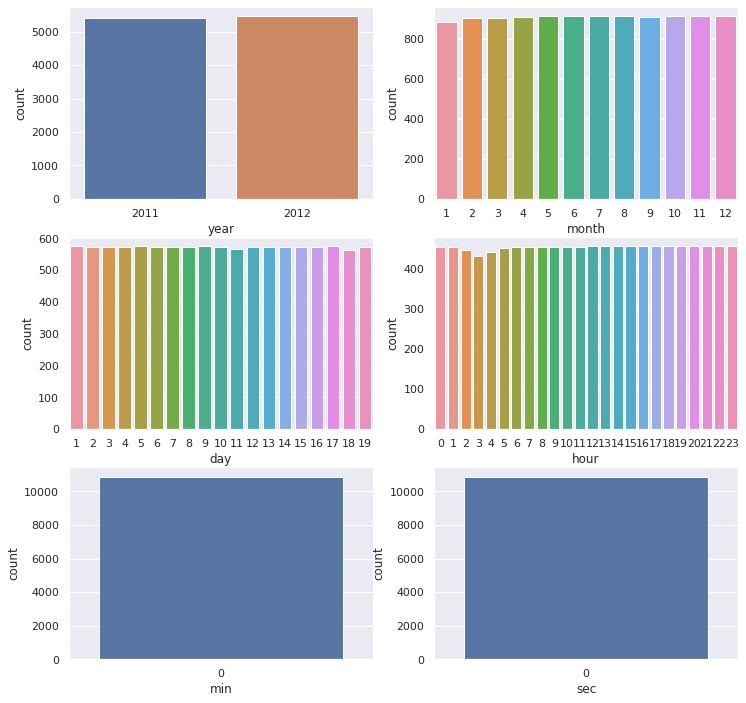

In [68]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
sns.countplot(ax=axes[0,0], x="year", data=train_data)
sns.countplot(ax=axes[0,1], x="month", data=train_data)
sns.countplot(ax=axes[1,0], x="day", data=train_data)
sns.countplot(ax=axes[1,1], x="hour", data=train_data)
sns.countplot(ax=axes[2,0], x="min", data=train_data)
sns.countplot(ax=axes[2,1], x="sec", data=train_data)

In [18]:
#(4) X, y 컬럼 선택 및 train/test 데이터 분리
# casual, registered drop
train_data.drop(['casual', 'registered','datetime'], axis=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,min,sec
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19,0,0
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20,0,0
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21,0,0
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22,0,0


In [20]:
# 4-1)rearrane
train_data = train_data[['season', 'holiday', 'workingday', 'weather', 'temp',
             'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour','min','sec','count']]
train_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,min,sec,count
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0,0,0,16
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1,0,0,40
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,2,0,0,32
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,3,0,0,13
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,4,0,0,1


In [21]:
#x,y arrange
X =  train_data[['season', 'holiday', 'workingday', 'weather', 'temp',
             'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour','min','sec']].values
y = train_data['count'].values

In [22]:
# 4-2)train/test 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 14) (8708,)
(2178, 14) (2178,)


In [23]:
#(5) LinearRegression 모델 학습
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
#(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
predictions = model.predict(X_test)
predictions

array([248.10627003,  48.79765547, 200.90676727, ..., 309.7528022 ,
        38.17030198, 243.62697388])

In [28]:
#(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse


19945.370053754086

In [29]:
rmse = mean_squared_error(y_test, predictions)**0.5
rmse

141.22807813517142

<AxesSubplot:xlabel='humidity', ylabel='count'>

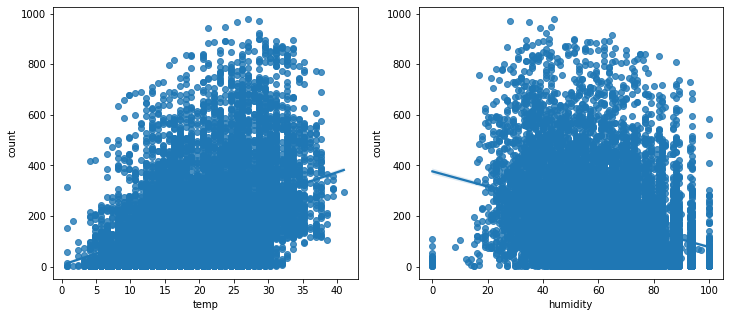

In [38]:
#(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.regplot(x="temp",y="count",data=train_data, ax=ax1)
sns.regplot(x="humidity",y="count",data=train_data, ax=ax2)

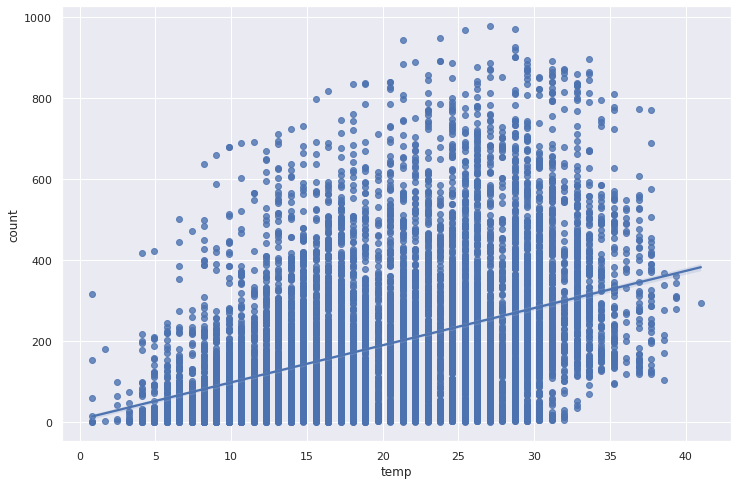

In [48]:
import seaborn as sns
#tips = sns.load_dataset("train_data")

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,1,1)
ax1 = sns.regplot(x="temp", y="count", data=train_data)

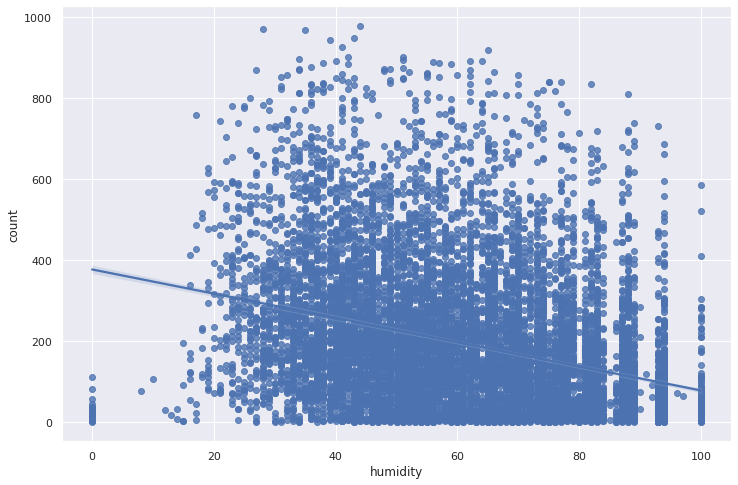

In [47]:
import seaborn as sns
#tips = sns.load_dataset("train_data")

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,1,1)
ax1 = sns.regplot(x="humidity", y="count", data=train_data)